### 1️⃣ Introduction — PCA (Principal Component Analysis) 📉

**PCA** is an **unsupervised dimensionality reduction technique** used to reduce the number of features while preserving as much variance as possible.  

- **Goal:** project data into a lower-dimensional space to simplify analysis, visualization, or preprocessing.  
- **Type:** Linear transformation technique.  
- **Applications:**  
  - Data visualization (2D/3D plots)  
  - Noise reduction  
  - Preprocessing before supervised learning  
  - Feature extraction for machine learning


### 2️⃣ Intuition Behind PCA 🧠

- High-dimensional data often has **correlated features**.  
- PCA finds **new axes (principal components)** along directions of maximum variance.  
- The first principal component captures the most variance, the second is orthogonal to the first, and so on.  
- Reduces dimensions while retaining most information.

**Visualization:**
- Original features → rotated to align with directions of maximum variance.


### 3️⃣ PCA Equations & Math ✏️

1. **Center the data:**

$$
X_{centered} = X - \bar{X}
$$

2. **Compute covariance matrix:**

$$
\Sigma = \frac{1}{n-1} X_{centered}^T X_{centered}
$$

3. **Eigen decomposition:**

$$
\Sigma v = \lambda v
$$

- $v$ = eigenvector (principal component direction)  
- $\lambda$ = eigenvalue (variance along that direction)

4. **Sort eigenvectors by eigenvalues** (descending).  

5. **Select top $k$ eigenvectors** to form projection matrix $V_k$.  

6. **Transform data to lower dimension:**

$$
X_{reduced} = X_{centered} \cdot V_k
$$


### 4️⃣ Step-by-Step PCA Algorithm 🧩

1. Standardize features (zero mean, unit variance).  
2. Compute covariance matrix of standardized data.  
3. Perform eigen decomposition → get eigenvalues & eigenvectors.  
4. Sort eigenvectors by eigenvalues (largest first).  
5. Choose top k eigenvectors → principal components.  
6. Project original data onto these principal components.  
7. Use transformed data for visualization or machine learning.


In [1]:
### 5️⃣ PCA Implementation — Example (Iris Dataset)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load data
X, y = load_iris(return_X_y=True)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit PCA (reduce to 2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Explained variance
print("Explained variance ratio:", pca.explained_variance_ratio_)


Explained variance ratio: [0.72962445 0.22850762]


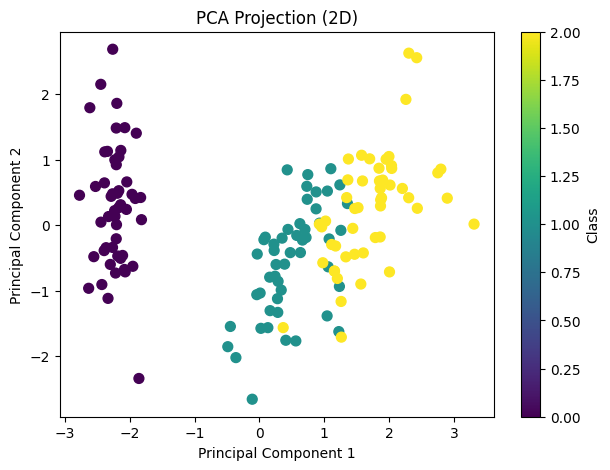

In [2]:
### 6️⃣ PCA Visualization
plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='viridis', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection (2D)')
plt.colorbar(label='Class')
plt.show()


### 7️⃣ Interpreting PCA Output 🔍

- **Principal Components:** new axes along which data has maximum variance.  
- **Explained Variance Ratio:** fraction of total variance captured by each principal component.  

Example:

$$
\text{Explained variance ratio} = \frac{\lambda_i}{\sum_j \lambda_j}
$$

- Helps decide how many components to keep (e.g., choose enough to capture ≥90% variance).


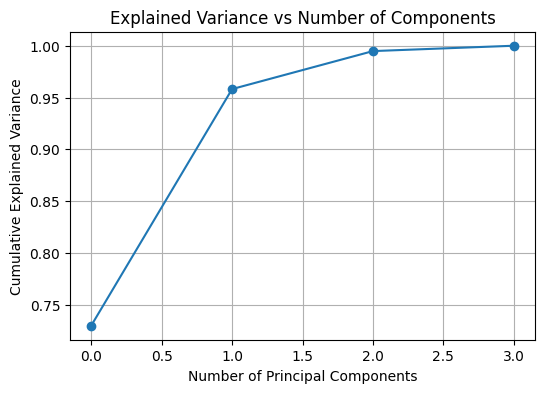

In [3]:
### 8️⃣ PCA — Explained Variance Plot
pca_full = PCA()
pca_full.fit(X_scaled)
plt.figure(figsize=(6,4))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of Components')
plt.grid(True)
plt.show()


### 9️⃣ PCA from Scratch — Step-by-Step 🛠️

**Steps:**

1. Standardize the data.  
2. Compute covariance matrix: 

$$
\Sigma = \frac{1}{n-1} X^T X
$$

3. Compute eigenvalues and eigenvectors of $\Sigma$.  
4. Sort eigenvectors by descending eigenvalues.  
5. Choose top $k$ eigenvectors → projection matrix $V_k$.  
6. Project data: 

$$
X_{reduced} = X \cdot V_k
$$

7. Optionally, reconstruct data: 

$$
X_{approx} = X_{reduced} \cdot V_k^T + \bar{X}
$$


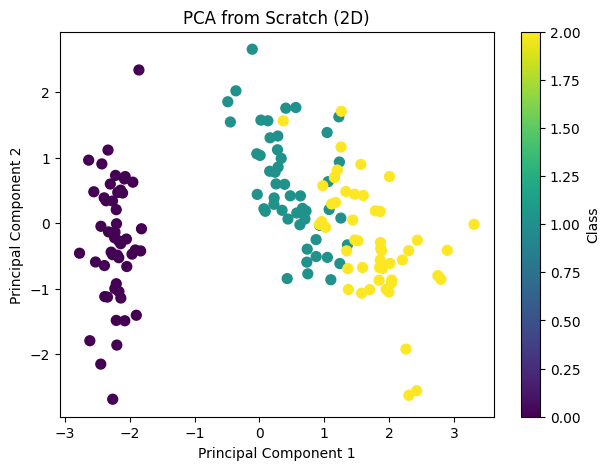

In [4]:
### 10️⃣ PCA from Scratch Implementation
# Standardize
X_centered = X_scaled - np.mean(X_scaled, axis=0)

# Covariance matrix
cov_matrix = np.cov(X_centered.T)

# Eigen decomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvectors by eigenvalues
idx = np.argsort(eigenvalues)[::-1]
eigenvectors = eigenvectors[:, idx]
eigenvalues = eigenvalues[idx]

# Select top 2 components
V_k = eigenvectors[:, :2]
X_reduced_scratch = X_centered.dot(V_k)

# Plot
plt.figure(figsize=(7,5))
plt.scatter(X_reduced_scratch[:,0], X_reduced_scratch[:,1], c=y, cmap='viridis', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA from Scratch (2D)')
plt.colorbar(label='Class')
plt.show()


### 🔟 Advantages, Limitations & Use Cases ✅

**Advantages:**
- Reduces dimensionality → faster computation, visualization.  
- Removes correlated features → decorrelates data.  
- Noise reduction.  
- Improves performance of ML models in high dimensions.

**Limitations:**
- Linear method → cannot capture nonlinear relationships.  
- Principal components may not be interpretable.  
- Sensitive to feature scaling.

**Best Use Cases:**
- High-dimensional datasets (images, gene expression).  
- Visualization in 2D/3D.  
- Preprocessing before clustering, classification, or regression.
